##                                               Milk Quality Prediction 
This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

The code begins by importing necessary libraries for data analysis and machine learning. It includes pandas for data manipulation, numpy for numerical operations, matplotlib for plotting, seaborn for data visualization, and various classes and functions from scikit-learn for machine learning tasks.

#### DATA COLLECTION

In [2]:
df = pd.read_csv("milknew.csv")
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


### Understanding Given Data 
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
1) pH - The 'pH' column contains 1059 non-null float values. It represents the acidity or alkalinity of the milk samples
2) Temprature - The 'Temperature' column contains 1059 non-null integer values. It represents the temperature at which the milk samples were taken
3) Taste - The 'Taste' column contains 1059 non-null integer values.It appears to be a binary categorical feature, where 1 likely indicates a positive taste, and 0 indicates a negative taste for the milk samples.
4) Odor - The 'Odor' column contains 1059 non-null integer values. Similar to 'Taste', it appears to be a binary categorical feature, where 1 likely indicates the presence of odor, and 0 indicates no odor in the milk samples.
5) Fat - The 'Fat' column contains 1059 non-null integer values. It is a binary categorical feature, where 1 likely represents high fat content, and 0 represents low fat content in the milk samples.
6) Turbidity - The 'Turbidity' column contains 1059 non-null integer values. It appears to be a binary categorical feature, where 1 likely indicates high turbidity (cloudiness or opacity), and 0 indicates low turbidity in the milk samples.
7) Colour - The 'Colour' column contains 1059 non-null integer values. It represents the color intensity of the milk samples, and since it is numerical, it is expected to be a continuous feature.
8) Grade - The 'Grade' column contains 1059 non-null object (string) values. It is the target variable representing the grade or quality of the milk samples.
There are no null values in Dataset


Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.

#### ANALYZING THE DATA

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [4]:
df.describe()  

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


From above table we get 5 number summary of dataset i.e. we get minimum, mean,median,standard deviation and maximum

### DATA CLEANING

#### Analyzing the target Column

In [5]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

Here, we can see data in target column is balanced

#### Checking for missing values.

In [6]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

There are no missing values in any of the columns of the dataset. 

### Visualization

#### 1) Pie Chart

<function matplotlib.pyplot.show(close=None, block=None)>

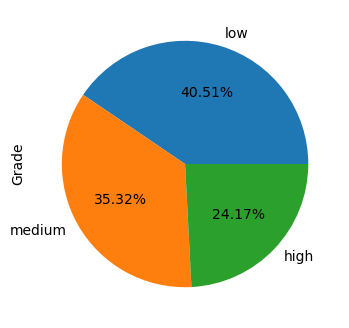

In [7]:
plt.figure(figsize=(4,4))
df['Grade'].value_counts().plot.pie(autopct="%1.2f%%")
plt.show

 Here we have plotted pie chart where we have shown percentage of Grade of Milk Quality, here low quality grade is maximum and high quality is minimum

#### 2) Heatmap

In [8]:
corr = df.corr()

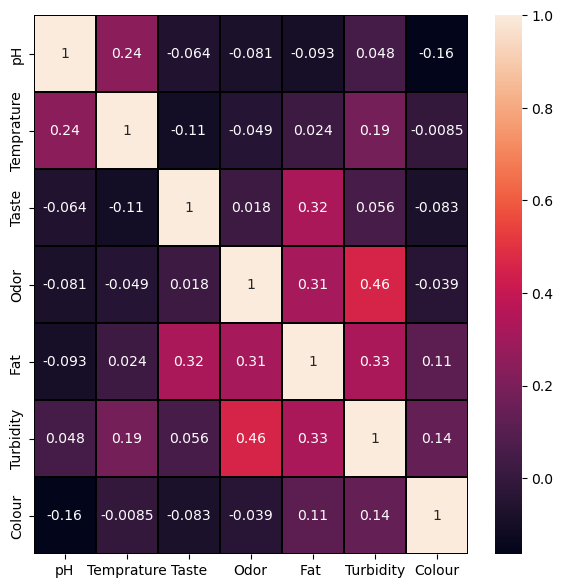

In [9]:
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True,cmap='rocket',linecolor='black',linewidths=0.2)
plt.show()

 here we have found the relation between various features using Heatmap

#### 3) Histplot

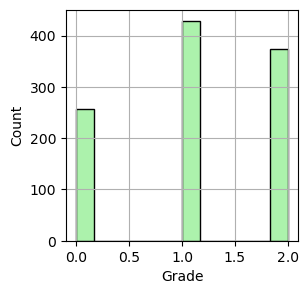

In [43]:
# histplot (categorical) 
plt.figure(figsize=(3,3))
sns.histplot(data=df, x='Grade',color='lightgreen')
plt.grid()
plt.show()

 Here we have plotted Histplot where we have shown percentage of Grade of Milk Quality, here low quality grade is maximum and high quality is minimum

## Encoding

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Grade']= le.fit_transform(df['Grade'])
df['Grade']

0       0
1       0
2       1
3       1
4       2
       ..
1054    2
1055    0
1056    1
1057    0
1058    1
Name: Grade, Length: 1059, dtype: int32

 By applying Label Encoding to the 'Grade' column, the categorical labels 'high', 'medium', and 'low' have been replaced with numerical representations. 

### Splitting Features and Target

In [12]:
x = df.iloc[:,:-1]
y = df["Grade"]

 splitting the DataFrame into two parts - features (x) and the target (y).

### Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x.iloc[:,:]=ss.fit_transform(x.iloc[:,:])

Using the StandardScaler from scikit-learn to standardize the numerical features in the DataFrame x. 

### Split data into train and test

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

Splitting the dataset into separate training and testing sets to evaluate the performance of the trained model.

### Model Building

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

 Logistic regression model is trained on the training data and the model makes predictions on the test data to obtain the predicted target values.

### Evaluate Model

In [16]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        71
           1       0.89      0.90      0.90       142
           2       0.93      0.85      0.89       105

    accuracy                           0.86       318
   macro avg       0.85      0.86      0.85       318
weighted avg       0.87      0.86      0.87       318



Printing the classification report, which provides a detailed evaluation of the model's performance on the test data, including precision, recall, F1-score, and support for each class in the target variable.

I am getting accuracy of 86% from LogisticRegression.

### Hypertuning using solver parameter

In [17]:
lr1 = LogisticRegression(solver='liblinear')
lr1.fit(xtrain,ytrain)
ypred = lr1.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75        71
           1       0.89      0.88      0.88       142
           2       0.95      0.85      0.89       105

    accuracy                           0.86       318
   macro avg       0.84      0.85      0.84       318
weighted avg       0.86      0.86      0.86       318



 Rebuilding model with the 'liblinear' solver and the classification report is printed.
 
 I am getting accuracy of 86% by using "liblinear" solver in LogisticRegression.

In [18]:
lr2 = LogisticRegression(solver='saga')
lr2.fit(xtrain,ytrain)
ypred = lr2.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        71
           1       0.89      0.90      0.90       142
           2       0.93      0.85      0.89       105

    accuracy                           0.86       318
   macro avg       0.85      0.86      0.85       318
weighted avg       0.87      0.86      0.87       318



 Rebuilding model with the 'saga' solver and the classification report is printed.
 
  I am getting accuracy of 86% by using "saga" solver in LogisticRegression.

In [19]:
lr = LogisticRegression(solver='sag')
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

In [20]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        71
           1       0.89      0.90      0.90       142
           2       0.93      0.85      0.89       105

    accuracy                           0.86       318
   macro avg       0.85      0.86      0.85       318
weighted avg       0.87      0.86      0.87       318



 Rebuilding model with the 'sag' solver and the classification report is printed.
 
  I am getting accuracy of 86% by using "sag" solver in LogisticRegression.

In [21]:
def mm(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    ac = accuracy_score(ytest,ypred)
    cr = classification_report(ytest,ypred)
    
    print(f"Accuracy_Score {ac} ")
    print(f"Classification_Report {cr} ")

 Creating a function called mm(model) that takes a machine learning model as input, fits the model on the training data, makes predictions on the test data, and then prints the accuracy score and classification report to evaluate the model's performance on the test data.

In [22]:
svm = SVC()
dt = DecisionTreeClassifier()

 In this step, two classifier models, Support Vector Machine (SVM) and Decision Tree, are instantiated.

## Support Vector Machine (SVM) 

In [23]:
mm(svm)

Accuracy_Score 0.9465408805031447 
Classification_Report               precision    recall  f1-score   support

           0       0.88      0.96      0.92        71
           1       1.00      0.96      0.98       142
           2       0.92      0.91      0.92       105

    accuracy                           0.95       318
   macro avg       0.94      0.95      0.94       318
weighted avg       0.95      0.95      0.95       318
 


mm function is called with the Support Vector Machine (SVM) model as an argument, which fits the SVM model on the training data, makes predictions on the test data, and prints the accuracy score and classification report.

I am getting accuracy of 95% from Support Vector Machine.


## HPT SVM

In [24]:
svm1 = SVC(kernel = "linear")
mm(svm1)

Accuracy_Score 0.8490566037735849 
Classification_Report               precision    recall  f1-score   support

           0       0.67      0.93      0.78        71
           1       0.93      0.81      0.87       142
           2       0.93      0.85      0.89       105

    accuracy                           0.85       318
   macro avg       0.84      0.86      0.84       318
weighted avg       0.87      0.85      0.85       318
 


Rebuilding model with the 'linear' kernel and the classification report is printed.

I am getting accuracy of 85% by using "linear" kernel in Support Vector Machine.

In [25]:
svm2 = SVC(kernel = "poly")
mm(svm2)

Accuracy_Score 0.9150943396226415 
Classification_Report               precision    recall  f1-score   support

           0       0.80      0.94      0.86        71
           1       0.97      0.92      0.95       142
           2       0.94      0.89      0.91       105

    accuracy                           0.92       318
   macro avg       0.90      0.92      0.91       318
weighted avg       0.92      0.92      0.92       318
 


 Rebuilding model with the 'poly' kernel and the classification report is printed.
 
 I am getting accuracy of 92% by using "poly" kernel in Support Vector Machine.

In [26]:
svm4 = SVC(kernel = "rbf")
mm(svm4)

Accuracy_Score 0.9465408805031447 
Classification_Report               precision    recall  f1-score   support

           0       0.88      0.96      0.92        71
           1       1.00      0.96      0.98       142
           2       0.92      0.91      0.92       105

    accuracy                           0.95       318
   macro avg       0.94      0.95      0.94       318
weighted avg       0.95      0.95      0.95       318
 


 Rebuilding model with the 'rbf' kernel and the classification report is printed.
 
 I am getting accuracy of 95% by using "rbf" kernel in Support Vector Machine.

#### In Support Vector Machine "rbf" Kernel is giving us the best Accuracy

### Decision Tree

In [27]:
mm(dt)

Accuracy_Score 1.0 
Classification_Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00       142
           2       1.00      1.00      1.00       105

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318
 


 mm function is called with the Decision Tree model as an argument, which fits the SVM model on the training data, makes predictions on the test data, and prints the accuracy score and classification report.

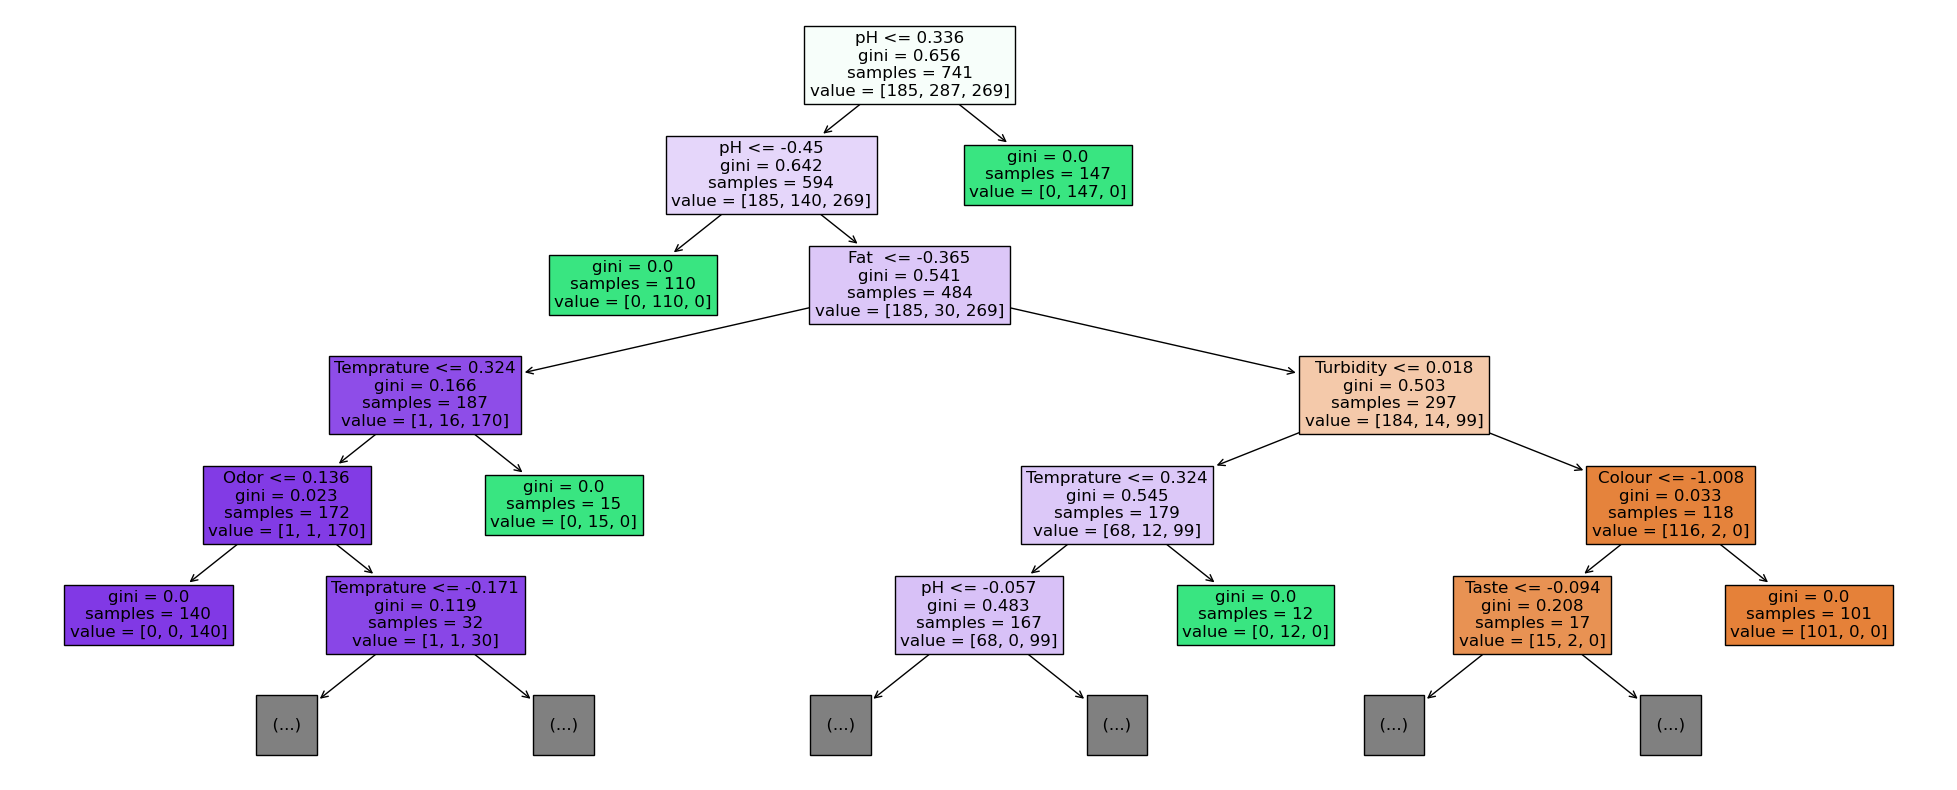

In [28]:
fig,ax=plt.subplots(figsize=(25,10))
chart=tree.plot_tree(dt,max_depth=5,feature_names=x.columns,filled=True,fontsize=12)
plt.savefig('Dt figure.pdf')   #### we can also save as 'Dt figure.jpg'

In [29]:
dt.score(xtrain,ytrain)

1.0

In [30]:
dt.score(xtest,ytest)

1.0

 Checking overfitting

#### Pruning Techniques

#### Max Depth

In [31]:
for i in range(1,30):
    dt1 = DecisionTreeClassifier(max_depth = i)
    dt1.fit(xtrain,ytrain)
    ypred = dt1.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f" max depth of {i} is {ac} ")

 max depth of 1 is 0.5283018867924528 
 max depth of 2 is 0.7138364779874213 
 max depth of 3 is 0.7955974842767296 
 max depth of 4 is 0.8867924528301887 
 max depth of 5 is 0.9182389937106918 
 max depth of 6 is 0.9213836477987422 
 max depth of 7 is 0.9842767295597484 
 max depth of 8 is 0.9842767295597484 
 max depth of 9 is 0.9842767295597484 
 max depth of 10 is 1.0 
 max depth of 11 is 1.0 
 max depth of 12 is 0.9968553459119497 
 max depth of 13 is 1.0 
 max depth of 14 is 1.0 
 max depth of 15 is 1.0 
 max depth of 16 is 0.9968553459119497 
 max depth of 17 is 1.0 
 max depth of 18 is 1.0 
 max depth of 19 is 1.0 
 max depth of 20 is 1.0 
 max depth of 21 is 1.0 
 max depth of 22 is 0.9968553459119497 
 max depth of 23 is 1.0 
 max depth of 24 is 1.0 
 max depth of 25 is 0.9968553459119497 
 max depth of 26 is 0.9968553459119497 
 max depth of 27 is 1.0 
 max depth of 28 is 1.0 
 max depth of 29 is 1.0 


In [32]:
dt2 = DecisionTreeClassifier(max_depth = 7) #8
mm(dt2)

Accuracy_Score 0.9811320754716981 
Classification_Report               precision    recall  f1-score   support

           0       0.99      0.93      0.96        71
           1       0.99      1.00      1.00       142
           2       0.96      0.99      0.98       105

    accuracy                           0.98       318
   macro avg       0.98      0.97      0.98       318
weighted avg       0.98      0.98      0.98       318
 


 Rebuilding model with the 'max_depth' pruning technique and the classification report is printed.
 
 I am getting accuracy of 98% by using "max_depth" Pruning Techniques in DecisionTree.

In [33]:
dt2.score(xtrain,ytrain)

0.9676113360323887

In [34]:
dt2.score(xtest,ytest)

0.9811320754716981

 Checking Overfitting

#### Min Sample Leaf

In [35]:
for i in range(1,90):
    dt3 = DecisionTreeClassifier(min_samples_leaf = i)
    dt3.fit(xtrain,ytrain)
    ypred = dt3.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f" min sample leaf of {i} is {ac} ")

 min sample leaf of 1 is 0.9968553459119497 
 min sample leaf of 2 is 1.0 
 min sample leaf of 3 is 0.9968553459119497 
 min sample leaf of 4 is 0.9968553459119497 
 min sample leaf of 5 is 0.9842767295597484 
 min sample leaf of 6 is 0.9842767295597484 
 min sample leaf of 7 is 0.9842767295597484 
 min sample leaf of 8 is 0.9842767295597484 
 min sample leaf of 9 is 0.9842767295597484 
 min sample leaf of 10 is 0.9842767295597484 
 min sample leaf of 11 is 0.9842767295597484 
 min sample leaf of 12 is 0.9842767295597484 
 min sample leaf of 13 is 0.9559748427672956 
 min sample leaf of 14 is 0.9559748427672956 
 min sample leaf of 15 is 0.9528301886792453 
 min sample leaf of 16 is 0.9308176100628931 
 min sample leaf of 17 is 0.9308176100628931 
 min sample leaf of 18 is 0.9308176100628931 
 min sample leaf of 19 is 0.9308176100628931 
 min sample leaf of 20 is 0.9308176100628931 
 min sample leaf of 21 is 0.9308176100628931 
 min sample leaf of 22 is 0.9308176100628931 
 min sample 

In [36]:
dt4 = DecisionTreeClassifier(min_samples_leaf = 30)
mm(dt4)

Accuracy_Score 0.9213836477987422 
Classification_Report               precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       1.00      0.86      0.92       142
           2       0.81      0.99      0.89       105

    accuracy                           0.92       318
   macro avg       0.93      0.93      0.93       318
weighted avg       0.93      0.92      0.92       318
 


 Rebuilding model with the 'min_samples_leaf' pruning technique and the classification report is printed.
 
  I am getting accuracy of 92% by using "min_samples_leaf" Pruning Techniques in DecisionTree.

In [37]:
dt4.score(xtrain,ytrain)

0.9244264507422402

In [38]:
dt4.score(xtest,ytest)

0.9213836477987422

 Checking Overfitting

#### Min Sample Split

In [39]:
for i in range(2,200):
    dt5 = DecisionTreeClassifier(min_samples_split = i)
    dt5.fit(xtrain,ytrain)
    ypred = dt5.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f" min sample split of {i} is {ac} ")

 min sample split of 2 is 0.9968553459119497 
 min sample split of 3 is 1.0 
 min sample split of 4 is 0.9968553459119497 
 min sample split of 5 is 0.9968553459119497 
 min sample split of 6 is 0.9968553459119497 
 min sample split of 7 is 1.0 
 min sample split of 8 is 0.9968553459119497 
 min sample split of 9 is 1.0 
 min sample split of 10 is 1.0 
 min sample split of 11 is 1.0 
 min sample split of 12 is 0.9968553459119497 
 min sample split of 13 is 0.9968553459119497 
 min sample split of 14 is 1.0 
 min sample split of 15 is 1.0 
 min sample split of 16 is 1.0 
 min sample split of 17 is 0.9968553459119497 
 min sample split of 18 is 1.0 
 min sample split of 19 is 1.0 
 min sample split of 20 is 0.9968553459119497 
 min sample split of 21 is 0.9968553459119497 
 min sample split of 22 is 0.9968553459119497 
 min sample split of 23 is 0.9968553459119497 
 min sample split of 24 is 0.9842767295597484 
 min sample split of 25 is 0.9842767295597484 
 min sample split of 26 is 0.9

In [40]:
dt6 = DecisionTreeClassifier(min_samples_split = 148) #39
mm(dt6)

Accuracy_Score 0.9213836477987422 
Classification_Report               precision    recall  f1-score   support

           0       0.74      1.00      0.85        71
           1       1.00      1.00      1.00       142
           2       1.00      0.76      0.86       105

    accuracy                           0.92       318
   macro avg       0.91      0.92      0.91       318
weighted avg       0.94      0.92      0.92       318
 


 Rebuilding model with the 'min_samples_split' pruning technique and the classification report is printed.
 
   I am getting accuracy of 92% by using "min_samples_split" Pruning Techniques in DecisionTree.

In [41]:
dt6.score(xtrain,ytrain)

0.9176788124156545

In [42]:
dt6.score(xtest,ytest)

0.9213836477987422

 Checking OverFitting

#### In Decision Tree "mean_sample_leaf" Pruning Technique is giving us the best Accuracy of 92% with no overfitting